In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense
from utility import get_sample_df,train_prediction_based_models
from models import predictionNn

In [11]:
df = get_sample_df()

In [12]:
nb_features = 1
window_size = 20
input_shape = (window_size,)
model = predictionNn(input_shape)
probation_period = 750 if(len(df)>=5000) else int(0.15*len(df))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [13]:
original_df = df

In [14]:
end_point = 800
df = original_df.iloc[0:end_point]
nb_epoch = 100
error_prediction = []
convergence_history = []
for i in np.arange(input_shape[0]+1,end_point):
    X_input = df["value"].values[i-(1+input_shape[0]):i-1].reshape((1,)+input_shape)
    Y_input = df["value"].values[i].reshape((1,1))
    history = model.fit(X_input,Y_input , nb_epoch=nb_epoch, verbose=0)
    error_prediction.append((model.predict(X_input) -Y_input)[0][0])
    convergence_history.append(history.history)
#        print(i)
temp_no_error = [0]*(input_shape[0]+1)
error_prediction = temp_no_error + error_prediction
#error_prediction[0:probation_period] = [0]*probation_period
df['anomaly_score'] = error_prediction


/opt/conda/lib/python3.6/site-packages/keras/models.py:981: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



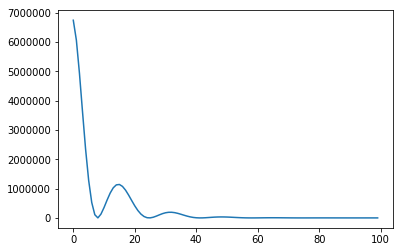

In [15]:
plt.plot(convergence_history[-1]['loss'])
#plt.plot(convergence_history[-2]['loss'])
#plt.plot(convergence_history[-3]['loss'])
#plt.plot(convergence_history[-4]['loss'])

In [19]:
df.anomaly_score.values

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -1.77200000e+04,  -1.72490000e+04,  -1.84630000e+04,
        -1.89080000e+04,  -1.88860000e+04,  -1.81780000e+04,
        -1.32660156e+02,  -1.02148438e+00,   5.43945312e+00,
        -1.05859375e+00,   7.78906250e+00,   1.62060547e+01,
         1.25527344e+01,  -3.66992188e+00,   1.02988281e+01,
         1.20859375e+01,   1.02617188e+01,  -2.72070312e+00,
        -1.68476562e+01,  -1.64316406e+01,  -8.17578125e+00,
         2.40195312e+01,   1.04824219e+01,  -4.45312500e-01,
        -8.78125000e+00,  -2.16660156e+01,   2.98896484e+01,
         1.47265625e+01,

In [16]:
df.loc[0:1548] = sum(df.anomaly_score)/len(df)

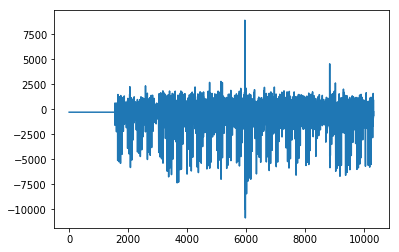

In [18]:
plt.plot(df.anomaly_score)

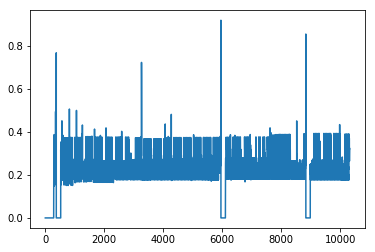

In [27]:
contextOSE_df = pd.read_csv("results/contextOSE/realKnownCause/contextOSE_nyc_taxi.csv")
plt.plot(contextOSE_df.anomaly_score)

In [1]:
import pickle